# Linear Regression Part (A)
## Getting the Dataset

The code snippet below is to reshape the training and testing of the independent variable into a 2-dimensional arrays for plotting purposes

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


### Useful functions

In [2]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [3]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [4]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

## Simple Linear Regression

Creating a new dataset for holding onto the columns needed for Simple Linear Regression. In the new dataset we made, it has a new column called 'Combine_Servings' that takes the total amount of beer, spirit, and wine serverings.

In [5]:
import pandas as pd

drink_Data.head()

new_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]

new_drink_Data['Combine_Servings'] = new_drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']].sum(axis=1)

new_drink_Data.head()

C:\Users\sho85\AppData\Local\Temp\ipykernel_9984\1029753255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_drink_Data['Combine_Servings'] = new_drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']].sum(axis=1)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Combine_Servings
0,0,0,0,0.0,0
1,89,132,54,4.9,275
2,25,0,14,0.7,39
3,245,138,312,12.4,695
4,217,57,45,5.9,319


### Preparing our train/test
Here, we create an x and y varaible that looks at the independent variable, Combine_Servings, and the dependent variable, Total_Litres_of_Pure_Alcohol. We then use the train_test_split method to split of our data into 2 different types, one for training and one for testing. We made the test size take 25% of the data and stored it to a random seed on 1.

In [6]:
x = new_drink_Data.iloc[:, 4].values #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [7]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=1)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(144,)
(144,)
(49,)
(49,)


The code snippet below is to reshape the training and testing of the independent variable into a 2-dimensional arrays for plotting purposes

In [9]:
# Making the training and testing 2 Dimensional arrays
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[274],
       [571],
       [385],
       [275],
       [  6],
       [583],
       [ 86],
       [328],
       [  6],
       [643],
       [404],
       [ 51],
       [ 55],
       [111],
       [123],
       [219],
       [106],
       [ 28],
       [553],
       [  0],
       [112],
       [  0],
       [  6],
       [234],
       [431],
       [369],
       [ 57],
       [  0],
       [ 49],
       [ 57],
       [665],
       [ 56],
       [279],
       [605],
       [488],
       [  0],
       [559],
       [  0],
       [  6],
       [640],
       [ 56],
       [634],
       [257],
       [134],
       [156],
       [ 39],
       [ 11],
       [295],
       [134],
       [439],
       [ 17],
       [  0],
       [233],
       [123],
       [638],
       [325],
       [380],
       [ 82],
       [529],
       [  0],
       [504],
       [169],
       [185],
       [ 83],
       [ 17],
       [382],
       [600],
       [122],
       [370],
       [ 72],
       [ 17],
      

In [10]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[459],
       [124],
       [ 21],
       [426],
       [ 43],
       [349],
       [197],
       [596],
       [130],
       [ 54],
       [ 62],
       [ 39],
       [216],
       [591],
       [147],
       [463],
       [ 45],
       [349],
       [152],
       [ 80],
       [ 36],
       [319],
       [  0],
       [436],
       [ 18],
       [  0],
       [ 30],
       [141],
       [ 11],
       [407],
       [ 44],
       [ 11],
       [ 23],
       [188],
       [ 50],
       [352],
       [328],
       [ 23],
       [398],
       [  0],
       [273],
       [360],
       [165],
       [541],
       [ 20],
       [  6],
       [120],
       [113],
       [565]], dtype=int64)

In [11]:
x = new_drink_Data.iloc[:, 4].values  #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values  #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [12]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(144,)
(144,)
(49,)
(49,)


In [13]:
# Making the training and testing 2 Dimensional arrays
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[274],
       [571],
       [385],
       [275],
       [  6],
       [583],
       [ 86],
       [328],
       [  6],
       [643],
       [404],
       [ 51],
       [ 55],
       [111],
       [123],
       [219],
       [106],
       [ 28],
       [553],
       [  0],
       [112],
       [  0],
       [  6],
       [234],
       [431],
       [369],
       [ 57],
       [  0],
       [ 49],
       [ 57],
       [665],
       [ 56],
       [279],
       [605],
       [488],
       [  0],
       [559],
       [  0],
       [  6],
       [640],
       [ 56],
       [634],
       [257],
       [134],
       [156],
       [ 39],
       [ 11],
       [295],
       [134],
       [439],
       [ 17],
       [  0],
       [233],
       [123],
       [638],
       [325],
       [380],
       [ 82],
       [529],
       [  0],
       [504],
       [169],
       [185],
       [ 83],
       [ 17],
       [382],
       [600],
       [122],
       [370],
       [ 72],
       [ 17],
      

In [14]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[459],
       [124],
       [ 21],
       [426],
       [ 43],
       [349],
       [197],
       [596],
       [130],
       [ 54],
       [ 62],
       [ 39],
       [216],
       [591],
       [147],
       [463],
       [ 45],
       [349],
       [152],
       [ 80],
       [ 36],
       [319],
       [  0],
       [436],
       [ 18],
       [  0],
       [ 30],
       [141],
       [ 11],
       [407],
       [ 44],
       [ 11],
       [ 23],
       [188],
       [ 50],
       [352],
       [328],
       [ 23],
       [398],
       [  0],
       [273],
       [360],
       [165],
       [541],
       [ 20],
       [  6],
       [120],
       [113],
       [565]], dtype=int64)

### Fitting
Here, we fit the training variables and display the intercept and slope of the line once fitted.

In [15]:
# Fitting
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
regressor.score(x_test, y_test)

0.6980800923002739

In [17]:
regressor.score(x_train, y_train)

0.9140145685882098

In [18]:
intercept = regressor.intercept_
intercept

0.5227534772978712

### Predicting
In this section, we use the predict method to predict the outcome of x_train and x_test and store it into a variable used for plotting to see how close our model is to the actual data

In [19]:
# Predicting; y_pred are the predicted results of the Combine_Servings
y_pred = regressor.predict(x_test)
y_pred

array([ 8.4791027 ,  2.67218115,  0.88676945,  7.90707759,  1.26811953,
        6.57235234,  3.93757003, 10.8538736 ,  2.77618572,  1.45879456,
        1.59746732,  1.19878315,  4.26691782, 10.76720313,  3.07086532,
        8.54843907,  1.30278771,  6.57235234,  3.15753579,  1.90948101,
        1.14678087,  6.05232951,  0.52275348,  8.08041853,  0.83476717,
        0.52275348,  1.0427763 ,  2.96686075,  0.71342851,  7.5777298 ,
        1.28545362,  0.71342851,  0.92143764,  3.78156318,  1.38945819,
        6.62435462,  6.20833636,  0.92143764,  7.42172295,  0.52275348,
        5.25496118,  6.76302737,  3.38287901,  9.90049842,  0.86943536,
        0.62675804,  2.60284478,  2.48150612, 10.31651668])

Plotting the training data first and including the predicted train set on y (red line)

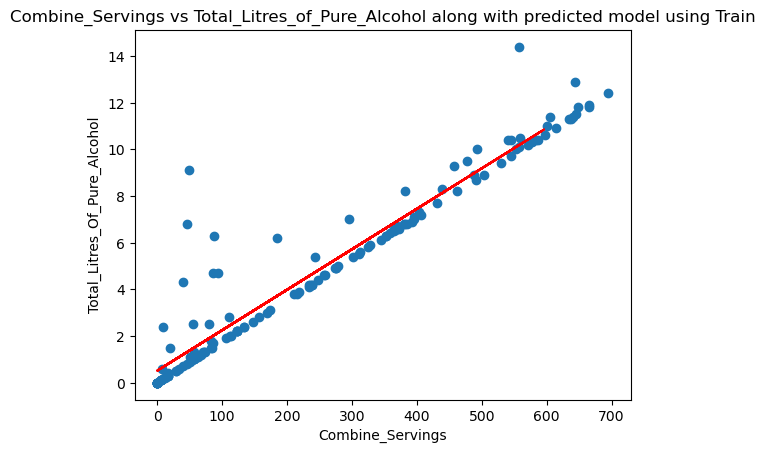

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train) # plotting the observation line
plt.plot(x_test, y_pred, color='red') # plotting the observation line but using the predicted dependent variable

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Train") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

In [21]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred))

Root mean squared error on testing = 1.8266
R-squared on testing= 0.6981


## Lasso Regression

In [22]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_train, y_train)

0.9104229115882162

In [23]:
y_pred_lasso_test = lasso_reg.predict(x_test)
y_pred_lasso_test

array([ 8.25308869,  2.81018009,  1.13668879,  7.71692157,  1.49413353,
        6.46586497,  3.99624674, 10.47899459,  2.90766502,  1.6728559 ,
        1.80283581,  1.42914358,  4.30494902, 10.39775715,  3.18387232,
        8.31807864,  1.52662851,  6.46586497,  3.26510976,  2.0952906 ,
        1.38040111,  5.97844032,  0.79549153,  7.87939646,  1.08794632,
        0.79549153,  1.28291618,  3.08638739,  0.97421391,  7.40821929,
        1.51038102,  0.97421391,  1.16918377,  3.85001934,  1.60786595,
        6.51460744,  6.12466771,  1.16918377,  7.2619919 ,  0.79549153,
        5.23105585,  6.64458734,  3.47632711,  9.58538273,  1.1204413 ,
        0.89297646,  2.74519014,  2.63145772,  9.97532245])

Plotting the testing data and observing how closely it resembles our train data.
Here we have two graphs that shows when we use the standard linear regression and the next graph when we use lasso regresssion (to fit the data better)

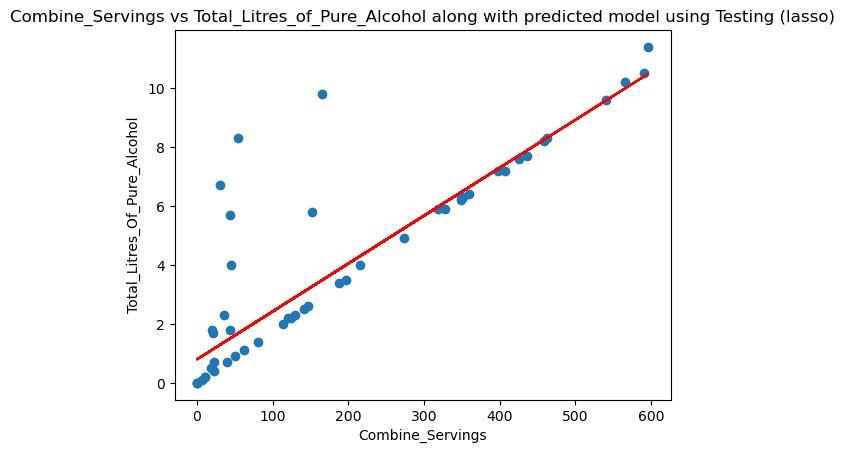

In [24]:
#plot for the TRAIN
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test) # data scattered on the graph 
plt.plot(x_test, y_pred_lasso_test, color='red') # plotting the observation line

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Testing (lasso)") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

### Finding the mean squarred error and the R-squared on both the testing and training models.
Mean Squared Error: how much the residuals vary around the fitted lines <br>
R-Squared: Correlation between x and y; ranges from 0 to 1; higher the number the better the model

In [25]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred_lasso_test))

Root mean squared error on testing = 1.7850
R-squared on testing= 0.7117


## Multiple Linear Regression
Using the same dataset, drinks.csv, we used all three servings columns, beer, spirit, and wine, as independent variables and have the dependent variable be the Total_litres_of_Pure_Alcohol. We then split the data into training and testing varaibles, saving only 25% for testing.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

x_train2, x_test2, y_train2, y_test2 = train_test_split(
  drink_Data.drop(columns=['total_litres_of_pure_alcohol', 'country', 'continent']), 
  drink_Data['total_litres_of_pure_alcohol'], 
  test_size=0.25,
  random_state=0)
print("x_train shape: ", x_train2.shape)
print("y_train shape: ", y_train2.shape)

print("x_test shape: ", x_test2.shape)
print("y_test shape: ", y_test2.shape)

x_train shape:  (144, 3)
y_train shape:  (144,)
x_test shape:  (49, 3)
y_test shape:  (49,)


### Fitting the training models
Here, we fit the training model and display the y-intercept and slope

In [27]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train2, y_train2)

LinearRegression()

In [28]:
regr.score(x_test2, y_test2)

0.8184310767713026

In [29]:
regr.score(x_train2, y_train2)

0.8905004885512054

In [30]:
intercept = regr.intercept_
intercept

0.6137880966226286

In [31]:
slope = regr.coef_
slope

array([0.01803339, 0.0163801 , 0.01632606])

Predicting the training data first

In [32]:
# Apply model to the test set
y_pred2 = regr.predict(x_test2)
y_pred2

array([ 0.6137881 ,  4.95718354,  8.44357939,  0.71697453,  0.6137881 ,
        1.62803282,  1.50468261,  1.57271168,  3.19396154,  4.10411377,
        5.28451951,  6.93048003,  7.23859976,  5.12989001,  0.82522893,
        6.07683173,  0.93838917,  4.77496331,  6.57519943,  1.9693534 ,
        0.96944203,  1.0822966 ,  0.6137881 ,  1.14641534,  1.38522416,
        1.68860262,  2.30220578,  4.87828059,  1.54050705,  2.07193951,
       11.71024539,  6.19537265,  3.19526609,  1.3775969 , 12.09615162,
        7.75070448,  1.29356602,  3.47884978, 11.59975079,  1.43406807,
        9.96099509,  0.71350582, 11.23522251,  2.06240732,  0.6137881 ,
        1.56573879, 11.41806541,  1.22190954,  2.72272402])

Plotting the training and predicted variables of the dependent values and showing the root mean squarred error and R-squarred score

Root mean squared error = 1.5794
R-squared = 0.8184


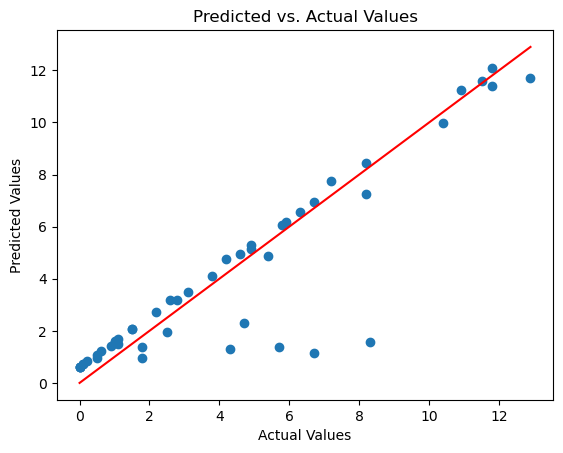

In [33]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test2, y_pred2)))
print('R-squared = %.4f' % r2_score(y_test2, y_pred2))


plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red')
plt.show()

## Regression and Classification
Using Admission dataset

In [34]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Normalizing CGPA, GRE Score, and TOEFL Score using the provided function in tutorial_5_regression

In [35]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,5,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,5,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,4,4.0,5.0,0.522436,0,0.73


In [36]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# admission_Data = admission_Data.drop(['Serial No.'], axis=1)
# sns.pairplot(admission_Data)
# plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    admission_Data.drop(columns=['Serial No.', 'University Rating', 'Research', 'SOP', 'LOR']),
    admission_Data['Chance of Admit'],
    test_size=0.25,
    random_state=3
)

print("x_train shape: ", x_train3.shape)
print("y_train shape: ", y_train3.shape)

print("x_test shape: ", x_test3.shape)
print("y_test shape: ", y_test3.shape)

x_train shape:  (375, 4)
y_train shape:  (375,)
x_test shape:  (125, 4)
y_test shape:  (125,)


In [38]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train3, y_train3)

LinearRegression()

In [39]:
# Apply model to the test set
y_pred3 = regr.predict(x_test3)

Root mean squared error = 0.0000
R-squared = 1.0000


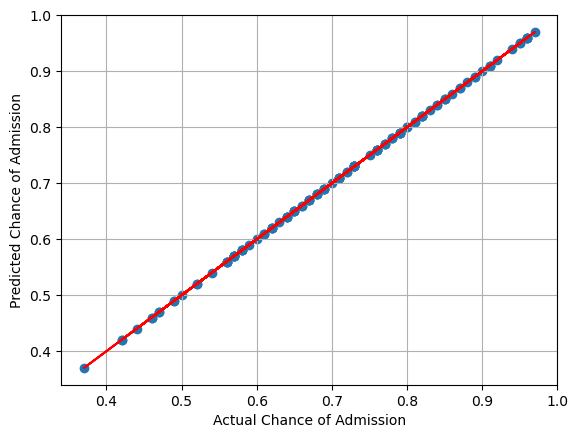

In [40]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test3, y_pred3)))
print('R-squared = %.4f' % r2_score(y_test3, y_pred3))

plt.scatter(y_test3, y_pred3)
plt.plot(y_test3, y_pred3, color='red')
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.grid(True)

### Classification

In [41]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [42]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,5,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,5,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,4,4.0,5.0,0.522436,0,0.73


Creating a classification column for Chance of Admit where 1 is admitted and 0 is not admitted

In [43]:
admission_Data['Admission_Status'] = (admission_Data['Chance of Admit'] > 0.7).astype(int)
admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Status
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92,1
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76,1
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72,1
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80,1
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,0.711538,1,0.87,1
496,497,0.94,0.892857,5,5.0,5.0,0.983974,1,0.96,1
497,498,0.80,1.000000,5,4.5,5.0,0.884615,1,0.93,1
498,499,0.44,0.392857,4,4.0,5.0,0.522436,0,0.73,1


In [44]:
# x = admission_Data.drop(columns=['Chance of Admit', 'Serial No.', 'University Rating', 'Research', 'SOP', 'LOR'])
x = admission_Data['Chance of Admit']
y = admission_Data['Admission_Status']

In [45]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.30, random_state=10)
print(x_train4.shape)
print(y_train4.shape)
print(x_test4.shape)
print(y_test4.shape)

(350,)
(350,)
(150,)
(150,)


In [46]:
x_train4 = np.array(x_train4).reshape(-1, 1)
x_test4 = np.array(x_test4).reshape(-1, 1)

In [47]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(x_train4, y_train4)

DecisionTreeRegressor(random_state=0)

In [48]:
y_pred4 = clf.predict(x_test4)
y_pred4

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.])

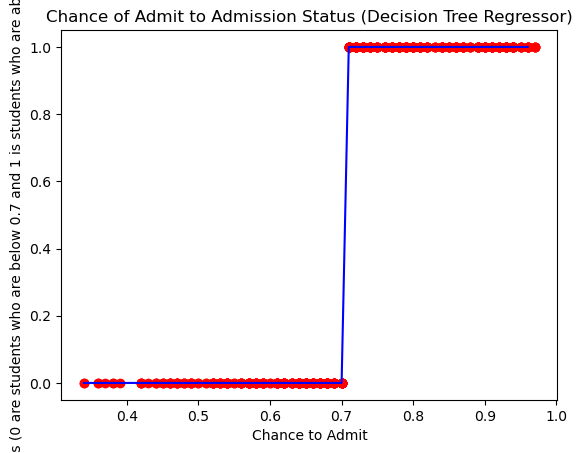

Root mean squared error = 0.0000
R-squared = 1.0000


In [49]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(x), max(x), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x, y, color = 'red')
plt.plot(X_grid, clf.predict(X_grid), color = 'blue')
plt.title('Chance of Admit to Admission Status (Decision Tree Regressor)')
plt.xlabel('Chance to Admit')
plt.ylabel('Admission Status (0 are students who are below 0.7 and 1 is students who are above 0.7 that got it)')
plt.show()

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test4, y_pred4)))
print('R-squared = %.4f' % r2_score(y_test4, y_pred4))

## Applying Lasso Regression

In [50]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,5,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,5,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,4,4.0,5.0,0.522436,0,0.73


In [51]:
x = admission_Data.drop(columns=['Chance of Admit', 'Serial No.', 'University Rating', 'Research', 'SOP', 'LOR'])
y = admission_Data['Chance of Admit']
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.30, random_state=10)
print(x_train5.shape)
print(y_train5.shape)
print(x_test5.shape)
print(y_test5.shape)

(350, 3)
(350,)
(150, 3)
(150,)


In [52]:
scaler = StandardScaler()
x_train5 = scaler.fit_transform(x_train5)
x_test5 = scaler.transform(x_test5)

In [53]:
alpha = 0.01  # You can tune this hyperparameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(x_train5, y_train5)

Lasso(alpha=0.01)

In [54]:
y_pred_test5 = lasso_model.predict(x_test5)

In [55]:
print(mean_squared_error(y_test5, y_pred_test5))
print(lasso_model.score(x_test5, y_test5))

0.0037351499765075737
0.781602475237787


Root mean squared error = 0.0611
R-squared = 0.7816


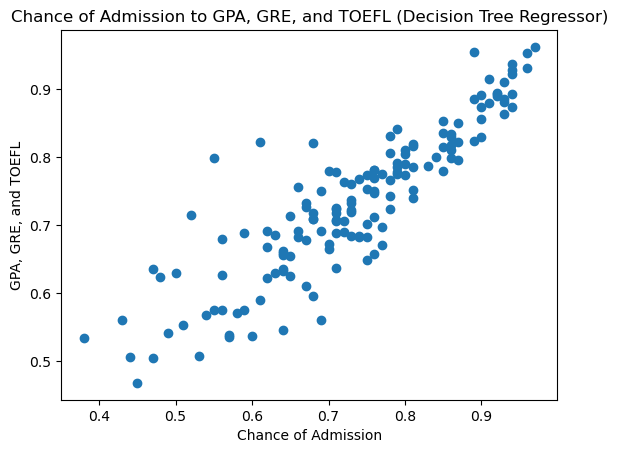

In [56]:
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test5, y_pred_test5)))
print('R-squared = %.4f' % r2_score(y_test5, y_pred_test5))

# X_grid = np.arange(min(x), max(x), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

# X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(y_test5, y_pred_test5)
# plt.plot(y_test4, y_pred_test4, color = 'red')
plt.title('Chance of Admission to GPA, GRE, and TOEFL (Decision Tree Regressor)')
plt.xlabel('Chance of Admission')
plt.ylabel('GPA, GRE, and TOEFL')
plt.show()

### Entrophy ID3 Exercise

In [57]:
#Loading Entrophy Dataset
import pandas as pd
import numpy as np

entrophy_dataset = pd.read_csv('Entrophy_ID3_Dataset.csv')

entrophy_dataset.head()


,color,shape,size,class
0,red,square,big,+
1,blue,square,big,+
2,red,round,small,-
3,green,square,small,-
4,red,round,big,+


### Calculate Total Entrophy

In order to find total entrophy, we get the total number of classes and the size of the dataset; and for every possible value for a class, we take -(total class count/ total_row) multiplied with the log2 of total class count/ total_row and add its value to total entrophy.

In [58]:
def total_entrophy(train, label, class_list): #class_list = list of possible values ['yes', 'no']; ['r','g','b'] 
    total_row = train.shape[0] #total size of dataset
    total_entrophy = 0

    
    for c in class_list:
        total_class_count = train[train[label] == c].shape[0] #number of classes
        total_class_entrophy = -(total_class_count/total_row) * np.log2(total_class_count/total_row) #entropy of the class
        total_entrophy += total_class_entrophy

    return total_entrophy

### ID3 for each Label

In [59]:
#TODO: Check if output values are correct

#If all examples are positive or all are negative then entropy will be zero i.e. low.
#If half of the examples are of positive class and half are of negative class then entropy is one i.e. high.

color_entrophy = total_entrophy(entrophy_dataset,'color', ['red','green','blue']) #Color
shape_entrophy = total_entrophy(entrophy_dataset,'shape', ['square','round']) #Shape
size_entrophy = total_entrophy(entrophy_dataset, 'size', ['big','small']) #Size
class_entrophy = total_entrophy(entrophy_dataset, 'class', ['+','-']) #Class

print("Entrophy of color:", color_entrophy)
print("Entrophy of shape:", shape_entrophy)
print("Entrophy of size:", size_entrophy)
print("Entrophy of class:", class_entrophy)





Entrophy of color: 1.4591479170272448
Entrophy of shape: 1.0
Entrophy of size: 0.9182958340544896
Entrophy of class: 1.0
